In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings # Supressing warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14,6) # Set figure size to (14,6)

In [2]:
# Import & clean Data

raw_data = pd.read_csv("TG_STAID002759.txt", delimiter=',',skiprows=19)

In [3]:
raw_data

,SOUID,DATE,TG,Q_TG
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0
...,...,...,...,...
25563,111448,20201227,16,0
25564,111448,20201228,28,0
25565,111448,20201229,23,0
25566,111448,20201230,25,0


In [4]:
raw_data.columns = ['id', 'date', 'temp', 'quality']

raw_data.head()

,id,date,temp,quality
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0


In [5]:
raw_data['id'].nunique()

1

In [6]:
raw_data['id'].value_counts()

111448    25568
Name: id, dtype: int64

In [7]:
raw_data['quality'].value_counts()

0    25568
Name: quality, dtype: int64

In [8]:
raw_data.drop(['id', 'quality'], axis=1, inplace=True)

raw_data.head()

,date,temp
0,19510101,-40
1,19510102,-14
2,19510103,-12
3,19510104,4
4,19510105,25


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25568 entries, 0 to 25567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    25568 non-null  int64
 1   temp    25568 non-null  int64
dtypes: int64(2)
memory usage: 399.6 KB


In [10]:
raw_data['date'] = raw_data['date'].astype(str)

raw_data['date'] = pd.to_datetime(raw_data['date'])

raw_data.head()

,date,temp
0,1951-01-01,-40
1,1951-01-02,-14
2,1951-01-03,-12
3,1951-01-04,4
4,1951-01-05,25


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25568 entries, 0 to 25567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    25568 non-null  datetime64[ns]
 1   temp    25568 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 399.6 KB


In [12]:
data = raw_data.set_index("date")

data.head()

,temp
date,
1951-01-01,-40
1951-01-02,-14
1951-01-03,-12
1951-01-04,4
1951-01-05,25


In [13]:
data_subset = data.loc['1980':'1982']

data_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 1980-01-01 to 1982-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   temp    1096 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


In [14]:
data['temp_c'] = data['temp']*0.1

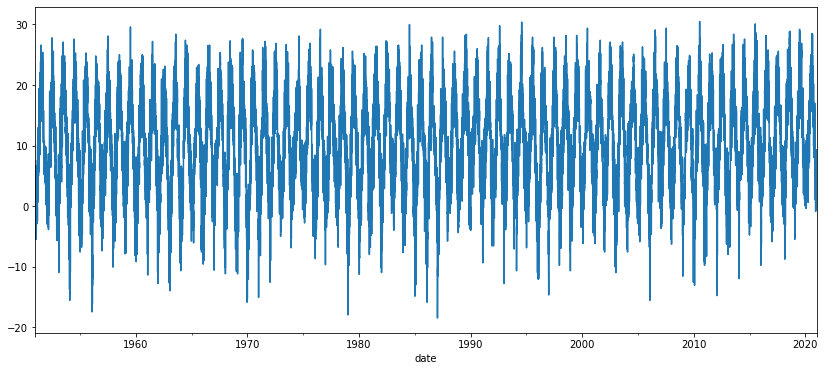

In [15]:
data['temp_c'].plot()

plt.show()

In [16]:
# divide into train and test

data_train = data.loc[:'2019']

data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25202 entries, 1951-01-01 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    25202 non-null  int64  
 1   temp_c  25202 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 590.7 KB


In [21]:
data_train.drop(['temp'], axis=1, inplace=True)

In [22]:
data_train.tail()

,temp_c
date,
2019-12-27,3.1
2019-12-28,1.3
2019-12-29,0.0
2019-12-30,4.5
2019-12-31,6.0


In [23]:
data_train.to_csv("temp_train.csv")

In [26]:
data_test = data.loc['2020']
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    366 non-null    int64  
 1   temp_c  366 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [28]:
data_test.drop(['temp'], axis=1, inplace=True)

In [29]:
data_test.tail()

,temp_c
date,
2020-12-27,1.6
2020-12-28,2.8
2020-12-29,2.3
2020-12-30,2.5
2020-12-31,2.6


In [20]:
data_test.to_csv("temp_test.csv")

In [ ]:
# Autoregression

In [30]:
data_train = pd.read_csv("temp_train.csv", parse_dates=True, index_col='date')

data_train.head()

,temp_c
date,
1951-01-01,-4.0
1951-01-02,-1.4
1951-01-03,-1.2
1951-01-04,0.4
1951-01-05,2.5


In [31]:
# Examine data 

data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25202 entries, 1951-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp_c  25202 non-null  float64
dtypes: float64(1)
memory usage: 393.8 KB


In [32]:
def plot_timeseries (df, title=" ", ylim=True):
    '''
    Custom plotting function for plotting the temperature dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    
    df.plot()
    plt.title(title)
    if ylim:
        plt.ylim(ymin=0)
    plt.ylabel("Temperature in Celsius")
    plt.show()

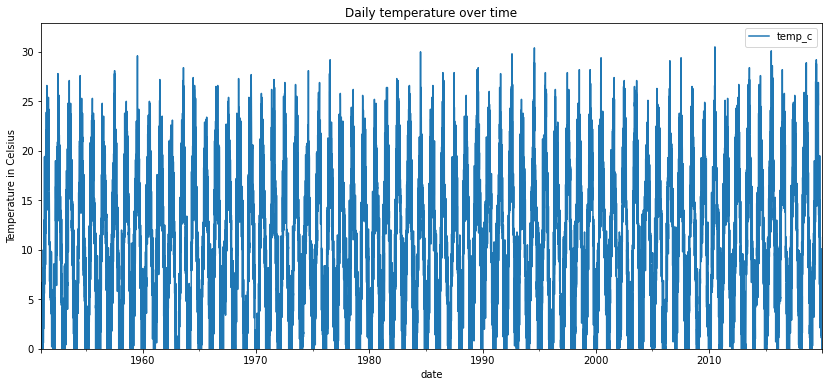

In [33]:
plot_timeseries(data_train, title="Daily temperature over time")

In [34]:
# Engineer feature to add to data that represents the time step/increment over time 

data_train['timestep'] = list(range(len(data_train)))
data_train.head()

,temp_c,timestep
date,,
1951-01-01,-4.0,0
1951-01-02,-1.4,1
1951-01-03,-1.2,2
1951-01-04,0.4,3
1951-01-05,2.5,4


In [35]:
m_trend = LinearRegression()  # instanciate a Linear Regression

X = data_train[['timestep']]  # feature
y = data_train[['temp_c']]  # response

m_trend.fit(X, y)  # fit the trend model

LinearRegression()

In [36]:
# Adding trend model predictions in a separate column

data_train['trend'] = m_trend.predict(X)

data_train.head()

,temp_c,timestep,trend
date,,,
1951-01-01,-4.0,0,8.886712
1951-01-02,-1.4,1,8.886786
1951-01-03,-1.2,2,8.886860
1951-01-04,0.4,3,8.886934
1951-01-05,2.5,4,8.887009


In [37]:
data_train['year'] = data_train.index.year
data_train['month'] = data_train.index.month
data_train['month_name'] = data_train.index.month_name()


data_train.head()

,temp_c,timestep,trend,year,month,month_name
date,,,,,,
1951-01-01,-4.0,0,8.886712,1951,1,January
1951-01-02,-1.4,1,8.886786,1951,1,January
1951-01-03,-1.2,2,8.886860,1951,1,January
1951-01-04,0.4,3,8.886934,1951,1,January
1951-01-05,2.5,4,8.887009,1951,1,January


In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25202 entries, 1951-01-01 to 2019-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_c      25202 non-null  float64
 1   timestep    25202 non-null  int64  
 2   trend       25202 non-null  float64
 3   year        25202 non-null  int64  
 4   month       25202 non-null  int64  
 5   month_name  25202 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ MB


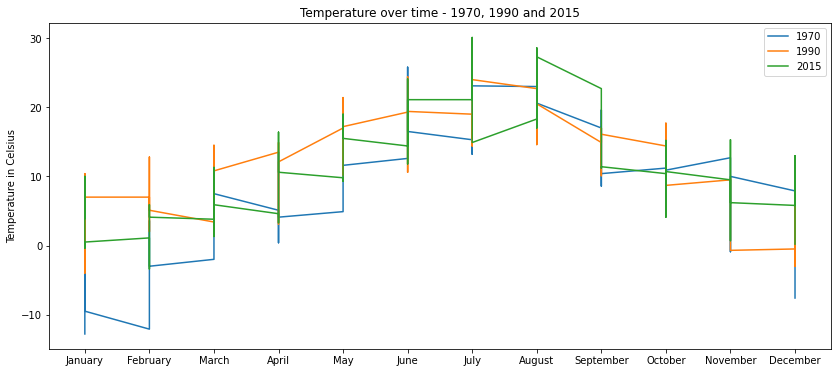

In [46]:
# Comparing over multiple years

fig, ax = plt.subplots()

data_1970 = data_train[data_train['year']==1970]
data_1990 = data_train[data_train['year']==1990]
data_2015 = data_train[data_train['year']==2015]

ax.plot(data_1970['month_name'], data_1970['temp_c'], label='1970')
ax.plot(data_1990['month_name'], data_1990['temp_c'], label='1990')
ax.plot(data_2015['month_name'], data_2015['temp_c'], label='2015')


plt.title ("Temperature over time - 1970, 1990 and 2015")
plt.ylabel("Temperature in Celsius")
plt.legend()
plt.show()

In [40]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25202 entries, 1951-01-01 to 2019-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_c      25202 non-null  float64
 1   timestep    25202 non-null  int64  
 2   trend       25202 non-null  float64
 3   year        25202 non-null  int64  
 4   month       25202 non-null  int64  
 5   month_name  25202 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ MB


In [47]:
# Hot-One Encoding

pd.get_dummies(data_train[['temp_c', 'timestep', 'month_name', 'trend']], prefix = '', prefix_sep='')

,temp_c,timestep,trend,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,,
1951-01-01,-4.0,0,8.886712,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-02,-1.4,1,8.886786,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-03,-1.2,2,8.886860,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-04,0.4,3,8.886934,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-05,2.5,4,8.887009,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,3.1,25197,10.757758,0,0,1,0,0,0,0,0,0,0,0,0
2019-12-28,1.3,25198,10.757832,0,0,1,0,0,0,0,0,0,0,0,0
2019-12-29,0.0,25199,10.757906,0,0,1,0,0,0,0,0,0,0,0,0


In [48]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25202 entries, 1951-01-01 to 2019-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_c      25202 non-null  float64
 1   timestep    25202 non-null  int64  
 2   trend       25202 non-null  float64
 3   year        25202 non-null  int64  
 4   month       25202 non-null  int64  
 5   month_name  25202 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 1.3+ MB


In [49]:
# Adding Hot-One Encoded month columns into the training data

data_train = pd.get_dummies(data_train, prefix='', prefix_sep='')

data_train.head()

,temp_c,timestep,trend,year,month,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,,,,
1951-01-01,-4.0,0,8.886712,1951,1,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-02,-1.4,1,8.886786,1951,1,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-03,-1.2,2,8.886860,1951,1,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-04,0.4,3,8.886934,1951,1,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-05,2.5,4,8.887009,1951,1,0,0,0,0,1,0,0,0,0,0,0,0


In [50]:
# Fit model that captures both trend and seasonality

X = data_train.drop(['trend', 'month', 'temp_c', 'year'], axis=1)  # features 
y = data_train['temp_c']

m_trend_seasonal = LinearRegression()  # includes month dummies and timestep

m_trend_seasonal.fit(X, y)  # fit the model

data_train['trend_seasonal'] = m_trend_seasonal.predict(X)  

data_train.head()

,temp_c,timestep,trend,year,month,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal
date,,,,,,,,,,,,,,,,,,
1951-01-01,-4.0,0,8.886712,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509811
1951-01-02,-1.4,1,8.886786,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509740
1951-01-03,-1.2,2,8.886860,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509668
1951-01-04,0.4,3,8.886934,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509597
1951-01-05,2.5,4,8.887009,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509526


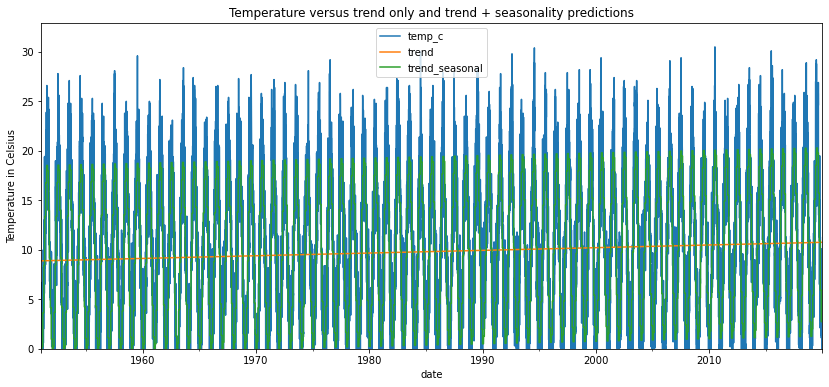

In [51]:
plot_timeseries(data_train[['temp_c', 'trend', 'trend_seasonal']], 
                title = 'Temperature versus trend only and trend + seasonality predictions')

In [53]:
# Calculating the error of our best model so far (trend + seasonality)

data_train['remainder'] = data_train['temp_c'] - data_train['trend_seasonal']

data_train.head()

,temp_c,timestep,trend,year,month,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder
date,,,,,,,,,,,,,,,,,,,
1951-01-01,-4.0,0,8.886712,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509811,-3.490189
1951-01-02,-1.4,1,8.886786,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509740,-0.890260
1951-01-03,-1.2,2,8.886860,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509668,-0.690332
1951-01-04,0.4,3,8.886934,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509597,0.909597
1951-01-05,2.5,4,8.887009,1951,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509526,3.009526


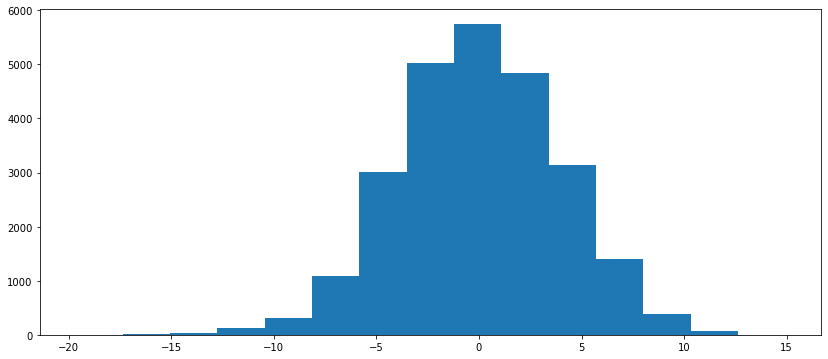

In [54]:
# Plotting the distribution of the remainder

plt.hist(data_train['remainder'], bins=15)

plt.show()

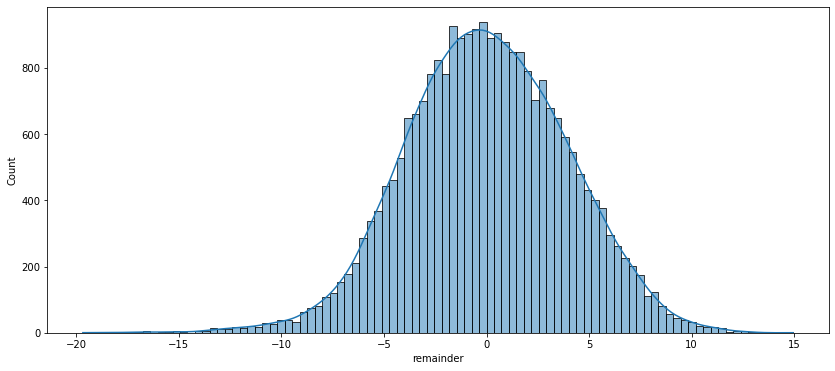

In [55]:
sns.histplot(data_train['remainder'], kde=True)

plt.show()

In [56]:
data_train['remainder'].std(), data_train['remainder'].mean()

(3.9336069138987515, -2.150983321481527e-15)

In [57]:
# Plot and compare with a random signal

data_train['random'] = np.random.normal(loc=0, scale=12, size=data_train.shape[0])

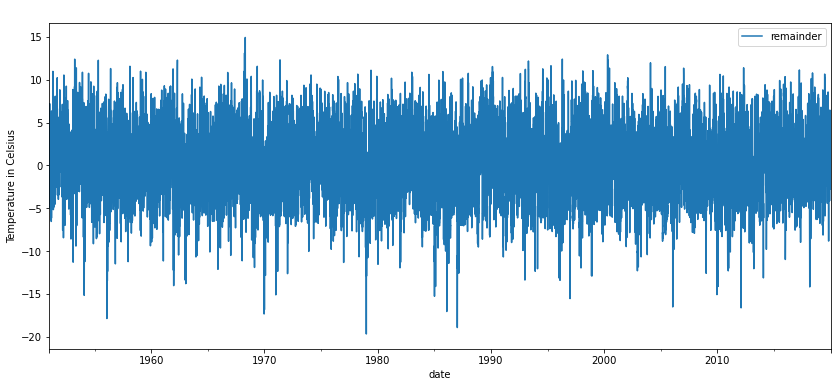

In [59]:
plot_timeseries(data_train[['remainder']], ylim=False)

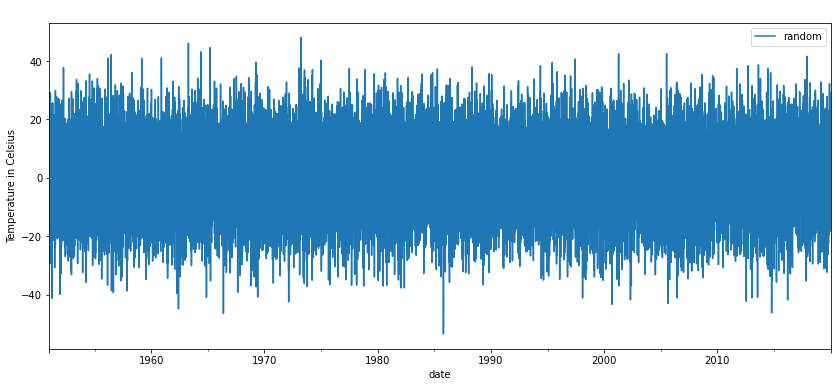

In [60]:
plot_timeseries(data_train[['random']], ylim=False)

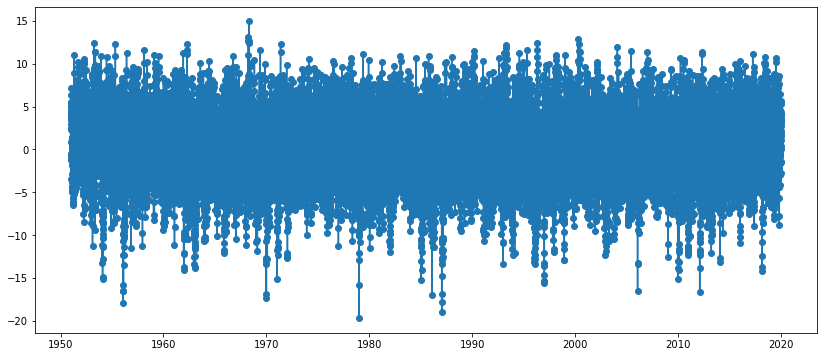

In [61]:
fig, ax = plt.subplots()
ax.plot(data_train.index, data_train['remainder'], marker='o')
plt.show()

In [62]:
remainder = data_train[['remainder']].copy()

remainder.head()

,remainder
date,
1951-01-01,-3.490189
1951-01-02,-0.890260
1951-01-03,-0.690332
1951-01-04,0.909597
1951-01-05,3.009526


In [63]:
remainder['lag1'] = remainder.shift(1) # shifting by one step == month

remainder.head()

,remainder,lag1
date,,
1951-01-01,-3.490189,NaN
1951-01-02,-0.890260,-3.490189
1951-01-03,-0.690332,-0.890260
1951-01-04,0.909597,-0.690332
1951-01-05,3.009526,0.909597


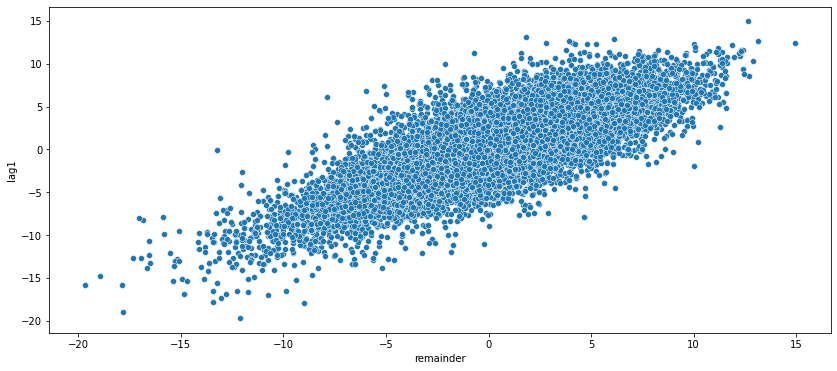

In [64]:
sns.scatterplot(x='remainder',  y='lag1', data=remainder);

plt.show()

In [65]:
remainder['remainder'].corr(remainder['lag1'])

0.8043813524759847

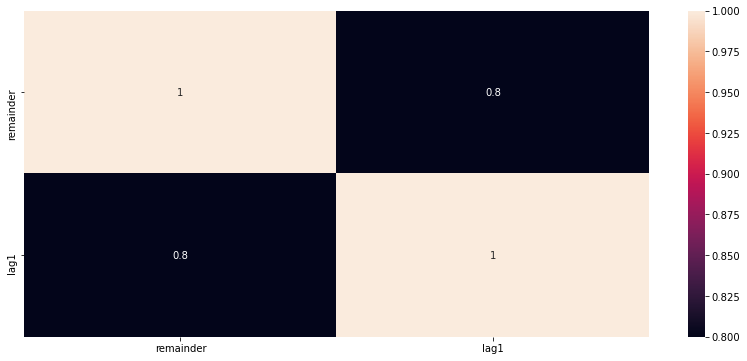

In [66]:
sns.heatmap(round(remainder.corr(), 2), annot=True)

plt.show()

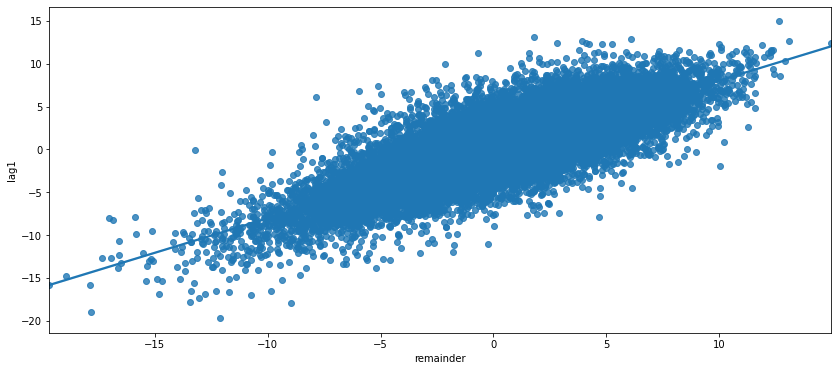

In [67]:
sns.regplot(x = remainder['remainder'], y = remainder['lag1'], fit_reg=True, scatter=True);

plt.show()

In [68]:
remainder.head()

,remainder,lag1
date,,
1951-01-01,-3.490189,NaN
1951-01-02,-0.890260,-3.490189
1951-01-03,-0.690332,-0.890260
1951-01-04,0.909597,-0.690332
1951-01-05,3.009526,0.909597


In [69]:
remainder_copy = remainder.copy()

In [70]:
remainder.dropna(inplace=True)

In [71]:
remainder.head()

,remainder,lag1
date,,
1951-01-02,-0.890260,-3.490189
1951-01-03,-0.690332,-0.890260
1951-01-04,0.909597,-0.690332
1951-01-05,3.009526,0.909597
1951-01-06,4.909455,3.009526


In [72]:
# Linear Regression

X = remainder[['lag1']]  
y = remainder['remainder']

m_ar = LinearRegression()

m_ar.fit(X, y)

remainder['prediction_ar1'] = m_ar.predict(X)

remainder.head()

,remainder,lag1,prediction_ar1
date,,,
1951-01-02,-0.890260,-3.490189,-2.807195
1951-01-03,-0.690332,-0.890260,-0.715865
1951-01-04,0.909597,-0.690332,-0.555046
1951-01-05,3.009526,0.909597,0.731904
1951-01-06,4.909455,3.009526,2.421044


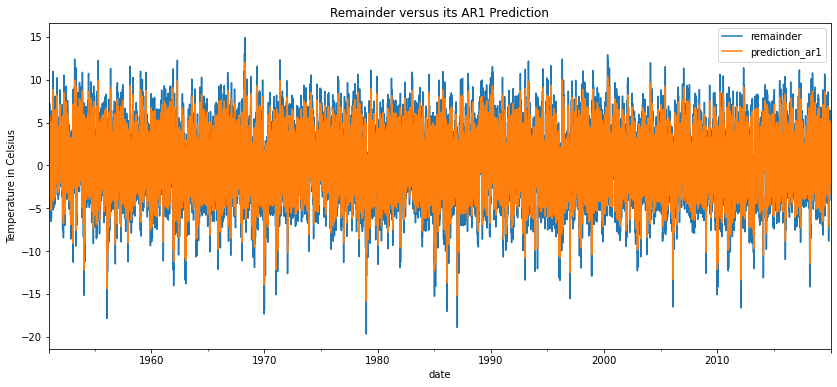

In [73]:
plot_timeseries(remainder[['remainder', 'prediction_ar1']], title="Remainder versus its AR1 Prediction", ylim=False)

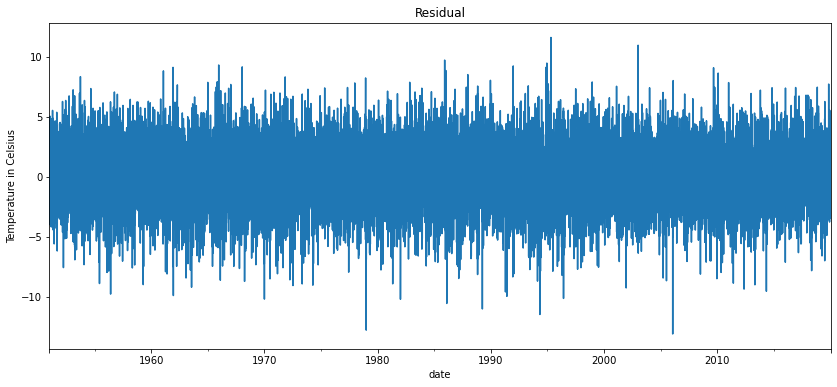

In [74]:
remainder['residual'] = remainder['remainder'] - remainder['prediction_ar1']

plot_timeseries(remainder['residual'], title="Residual", ylim=False)

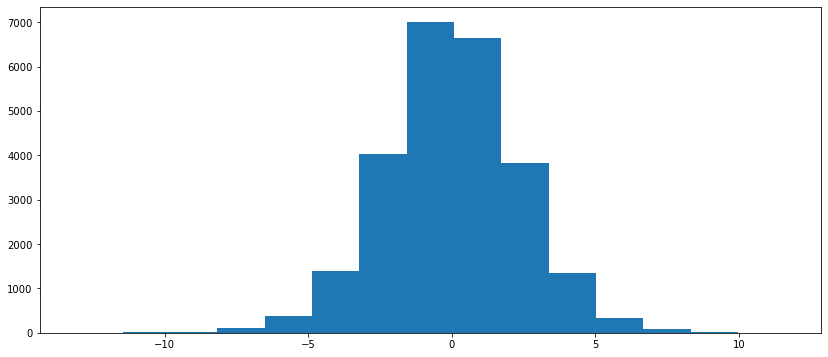

In [75]:
plt.hist(remainder['residual'], bins=15)

plt.show()

In [76]:
remainder['residual'].mean()

-6.268105707855532e-17

In [77]:
remainder_copy['lag2'] = remainder['lag1'].shift(1)

In [78]:
remainder_copy.head()

,remainder,lag1,lag2
date,,,
1951-01-01,-3.490189,NaN,NaN
1951-01-02,-0.890260,-3.490189,NaN
1951-01-03,-0.690332,-0.890260,-3.490189
1951-01-04,0.909597,-0.690332,-0.890260
1951-01-05,3.009526,0.909597,-0.690332


In [79]:
remainder_copy['remainder'].corr(remainder_copy['lag2'])

0.5987557737126944

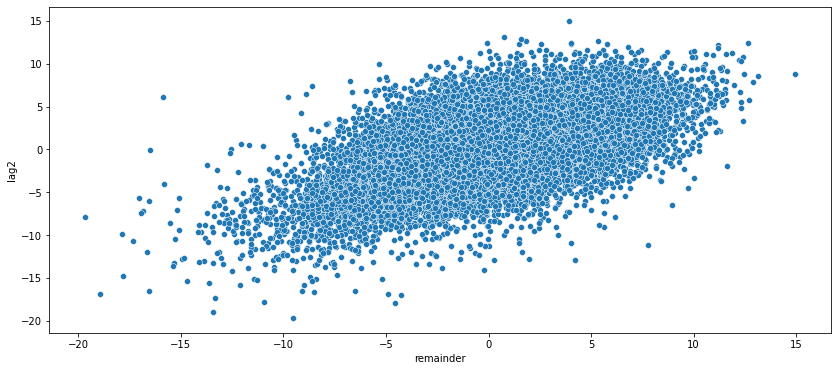

In [80]:
sns.scatterplot(x='remainder',  y='lag2', data=remainder_copy);

plt.show()

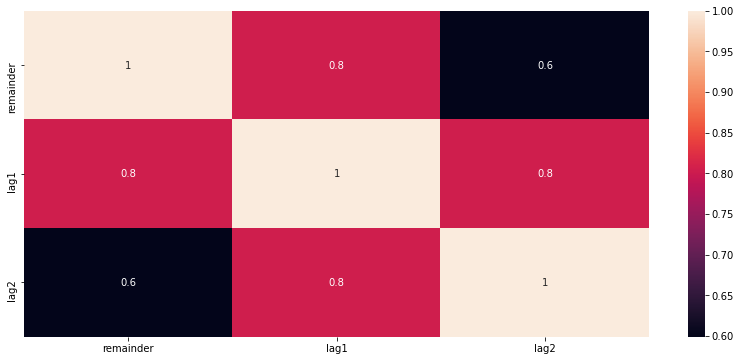

In [81]:
sns.heatmap(round(remainder_copy[['remainder', 'lag1', 'lag2']].corr(), 4), annot=True)

plt.show()

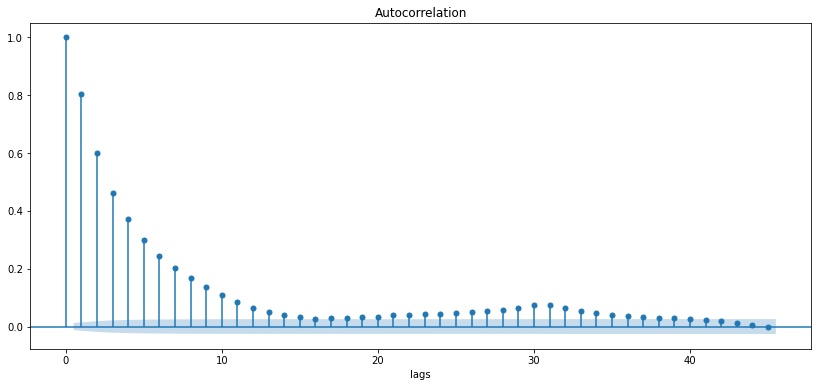

In [82]:
# Plot auto-correlation with stats model

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(remainder['remainder'])
plt.xlabel('lags');

plt.show()

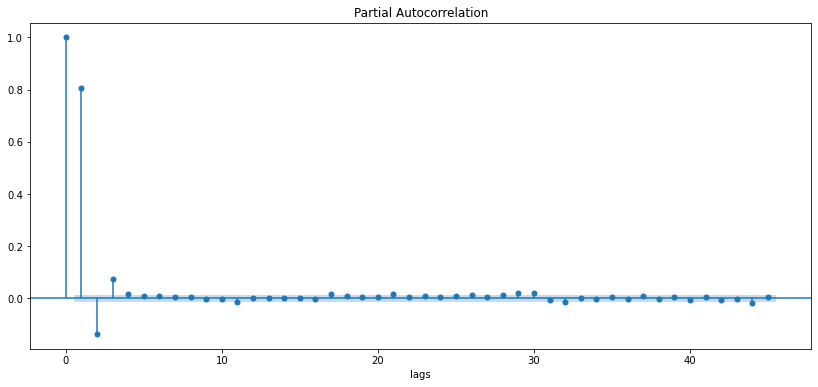

In [83]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(remainder['remainder'])
plt.xlabel('lags');

plt.show()

In [84]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [85]:
selected_order = ar_select_order(remainder_copy['remainder'], maxlag = 12) 

In [86]:
selected_order.ar_lags

array([1, 2, 3])

In [87]:
stats_ar1 = AutoReg(remainder_copy['remainder'], lags=1).fit()

In [88]:
stats_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                25202
Model:                     AutoReg(1)   Log Likelihood              -57150.689
Method:               Conditional MLE   S.D. of innovations              2.337
Date:                Thu, 27 Jan 2022   AIC                              1.698
Time:                        20:46:24   BIC                              1.699
Sample:                    01-02-1951   HQIC                             1.698
                         - 12-31-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0002      0.015      0.016      0.987      -0.029       0.029
remainder.L1     0.8044      0.004    214.932      0.000       0.797       0.812
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2432           +0.0000j            1.2432            0.0000
-----------------------------------------------------------------------------
"""

In [89]:
stats_ar1.predict()

1951-01-01         NaN
1951-01-02   -2.807195
1951-01-03   -0.715865
1951-01-04   -0.555046
1951-01-05    0.731904
                ...   
2019-12-27    1.734736
2019-12-28    0.286795
2019-12-29   -1.161146
2019-12-30   -2.206896
2019-12-31    1.412755
Freq: D, Length: 25202, dtype: float64

In [90]:
remainder['prediction_ar1']

date
1951-01-02   -2.807195
1951-01-03   -0.715865
1951-01-04   -0.555046
1951-01-05    0.731904
1951-01-06    2.421044
                ...   
2019-12-27    1.734736
2019-12-28    0.286795
2019-12-29   -1.161146
2019-12-30   -2.206896
2019-12-31    1.412755
Name: prediction_ar1, Length: 25201, dtype: float64

In [ ]:
# Forecast evaluation

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score
from statsmodels.tsa.ar_model import ar_select_order, AutoReg

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [92]:
# Custom plot function

def plot_timeseries(df, title="", ylim=True):
    """
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    
    """
    
    df.plot(linestyle='--', marker='o')
    plt.title(title)
    if ylim:
        plt.ylim(ymin=0)
    plt.ylabel("Temperature in Celsius")
    plt.show()

In [93]:
data_train = pd.read_csv("temp_train.csv", parse_dates=True, index_col='date')
data_train.head()

,temp_c
date,
1951-01-01,-4.0
1951-01-02,-1.4
1951-01-03,-1.2
1951-01-04,0.4
1951-01-05,2.5


In [95]:
# Add timestep feature = trend

data_train['timestep'] = list(range(data_train.shape[0]))
data_train.head()

,temp_c,timestep
date,,
1951-01-01,-4.0,0
1951-01-02,-1.4,1
1951-01-03,-1.2,2
1951-01-04,0.4,3
1951-01-05,2.5,4


In [97]:
# Add month feature and convert to hot-one encoding 

data_train['month'] = data_train.index.month_name()

In [98]:
data_train.head()

,temp_c,timestep,month
date,,,
1951-01-01,-4.0,0,January
1951-01-02,-1.4,1,January
1951-01-03,-1.2,2,January
1951-01-04,0.4,3,January
1951-01-05,2.5,4,January


In [99]:
# Add month feature and convert to hot-one encoding 
# Flights_train['month'] = flights_train.index.month_name()

#data_train.head()

data_train = pd.get_dummies(data_train, prefix='', prefix_sep='')

data_train.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,
1951-01-01,-4.0,0,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-02,-1.4,1,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-03,-1.2,2,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-04,0.4,3,0,0,0,0,1,0,0,0,0,0,0,0
1951-01-05,2.5,4,0,0,0,0,1,0,0,0,0,0,0,0


In [100]:
# Define features and targets, instantiate model

X = data_train.drop('temp_c', axis=1)
y = data_train['temp_c']

m_trend_seasonal = LinearRegression()

In [101]:
# Train model and add predictions as a column trend_seasonal

m_trend_seasonal.fit(X, y)

data_train['trend_seasonal'] = m_trend_seasonal.predict(X)

data_train.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal
date,,,,,,,,,,,,,,,
1951-01-01,-4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.509811
1951-01-02,-1.4,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509740
1951-01-03,-1.2,2,0,0,0,0,1,0,0,0,0,0,0,0,-0.509668
1951-01-04,0.4,3,0,0,0,0,1,0,0,0,0,0,0,0,-0.509597
1951-01-05,2.5,4,0,0,0,0,1,0,0,0,0,0,0,0,-0.509526


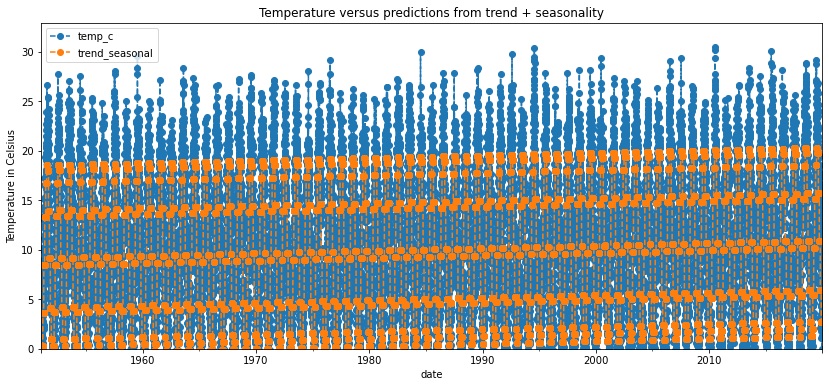

In [102]:
plot_timeseries(data_train[['temp_c', 'trend_seasonal']], 
                title="Temperature versus predictions from trend + seasonality")

In [104]:
# Extract remainder as a feature

data_train['remainder'] = data_train['temp_c'] - data_train['trend_seasonal']
data_train.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder
date,,,,,,,,,,,,,,,,
1951-01-01,-4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.509811,-3.490189
1951-01-02,-1.4,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509740,-0.890260
1951-01-03,-1.2,2,0,0,0,0,1,0,0,0,0,0,0,0,-0.509668,-0.690332
1951-01-04,0.4,3,0,0,0,0,1,0,0,0,0,0,0,0,-0.509597,0.909597
1951-01-05,2.5,4,0,0,0,0,1,0,0,0,0,0,0,0,-0.509526,3.009526


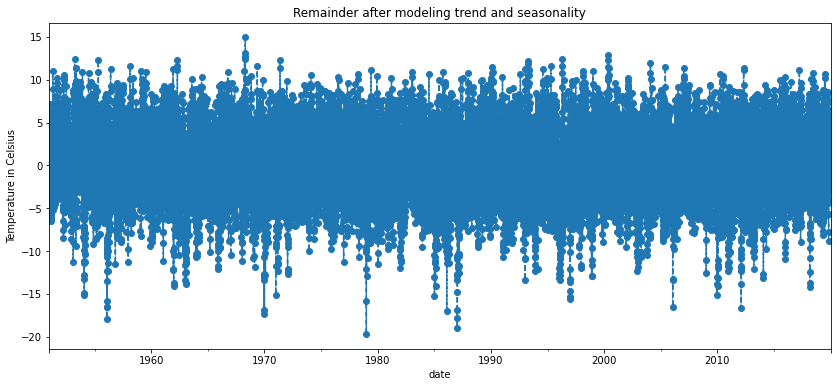

In [106]:
# Plot remainder 

plot_timeseries(data_train['remainder'], title="Remainder after modeling trend and seasonality", ylim=False)

In [107]:
# Adding now to model for better predictions for the main target temperature

data_train['lag1'] = data_train['remainder'].shift(1)

data_train.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1
date,,,,,,,,,,,,,,,,,
1951-01-01,-4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.509811,-3.490189,NaN
1951-01-02,-1.4,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509740,-0.890260,-3.490189
1951-01-03,-1.2,2,0,0,0,0,1,0,0,0,0,0,0,0,-0.509668,-0.690332,-0.890260
1951-01-04,0.4,3,0,0,0,0,1,0,0,0,0,0,0,0,-0.509597,0.909597,-0.690332
1951-01-05,2.5,4,0,0,0,0,1,0,0,0,0,0,0,0,-0.509526,3.009526,0.909597


In [108]:
# Drop na

data_train.dropna(inplace=True)

data_train.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1
date,,,,,,,,,,,,,,,,,
1951-01-02,-1.4,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509740,-0.890260,-3.490189
1951-01-03,-1.2,2,0,0,0,0,1,0,0,0,0,0,0,0,-0.509668,-0.690332,-0.890260
1951-01-04,0.4,3,0,0,0,0,1,0,0,0,0,0,0,0,-0.509597,0.909597,-0.690332
1951-01-05,2.5,4,0,0,0,0,1,0,0,0,0,0,0,0,-0.509526,3.009526,0.909597
1951-01-06,4.4,5,0,0,0,0,1,0,0,0,0,0,0,0,-0.509455,4.909455,3.009526


In [109]:
# Define new X and y and instantiate model

X = data_train.drop(['temp_c', 'trend_seasonal', 'remainder'], axis=1)
y = data_train['temp_c']

m_full = LinearRegression()

In [110]:
X.head()

,timestep,April,August,December,February,January,July,June,March,May,November,October,September,lag1
date,,,,,,,,,,,,,,
1951-01-02,1,0,0,0,0,1,0,0,0,0,0,0,0,-3.490189
1951-01-03,2,0,0,0,0,1,0,0,0,0,0,0,0,-0.890260
1951-01-04,3,0,0,0,0,1,0,0,0,0,0,0,0,-0.690332
1951-01-05,4,0,0,0,0,1,0,0,0,0,0,0,0,0.909597
1951-01-06,5,0,0,0,0,1,0,0,0,0,0,0,0,3.009526


In [111]:
y.head()

date
1951-01-02   -1.4
1951-01-03   -1.2
1951-01-04    0.4
1951-01-05    2.5
1951-01-06    4.4
Name: temp_c, dtype: float64

In [112]:
# Train model and add predictions on training data

m_full.fit(X,y)

LinearRegression()

In [113]:
data_train['predictions_full'] = m_full.predict(X)

In [114]:
data_train.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,predictions_full
date,,,,,,,,,,,,,,,,,,
1951-01-02,-1.4,1,0,0,0,0,1,0,0,0,0,0,0,0,-0.509740,-0.890260,-3.490189,-3.285935
1951-01-03,-1.2,2,0,0,0,0,1,0,0,0,0,0,0,0,-0.509668,-0.690332,-0.890260,-1.194319
1951-01-04,0.4,3,0,0,0,0,1,0,0,0,0,0,0,0,-0.509597,0.909597,-0.690332,-1.033412
1951-01-05,2.5,4,0,0,0,0,1,0,0,0,0,0,0,0,-0.509526,3.009526,0.909597,0.253741
1951-01-06,4.4,5,0,0,0,0,1,0,0,0,0,0,0,0,-0.509455,4.909455,3.009526,1.943127


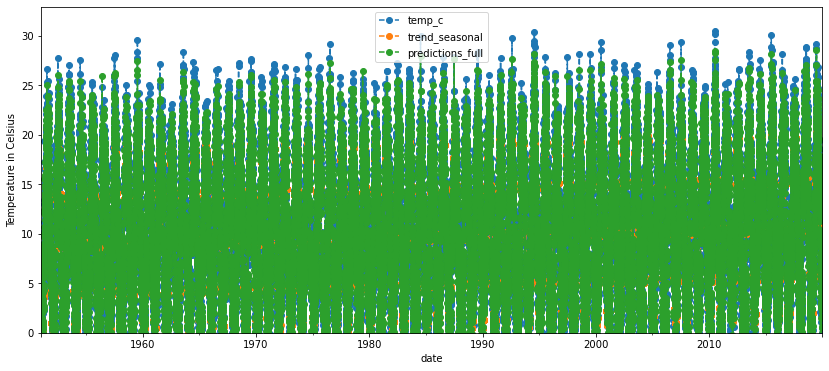

In [115]:
# Plot target and predictions

plot_timeseries(data_train[['temp_c', 'trend_seasonal', 'predictions_full']])

In [116]:
# Extracting full model coefficients after the training 

pd.DataFrame(m_full.coef_.reshape(1,14), columns=X.columns)

,timestep,April,August,December,February,January,July,June,March,May,November,October,September,lag1
0,0.000071,-0.461414,9.048552,-7.905545,-8.592035,-9.360517,9.63422,7.846093,-5.209575,4.436185,-4.729032,0.248292,5.044777,0.804463


In [117]:
# Create a TimeSeriesSplit object

ts_split = TimeSeriesSplit(n_splits=5)
time_cv = ts_split.split(X, y)

In [118]:
# Split the training data into folds

for i, (train_index, validation_index) in enumerate(time_cv):
    print("The training data for iteration #{} are the observations steps  = {}".format(i+1, train_index))
    print("size of training data = {}".format(len(train_index)))
    print("The validation data for iteration #{} are the observations steps = {}".format(i+1, validation_index))
    print("size of validation data = {}".format(len(validation_index)))

The training data for iteration #1 are the observations steps  = [   0    1    2 ... 4198 4199 4200]
size of training data = 4201
The validation data for iteration #1 are the observations steps = [4201 4202 4203 ... 8398 8399 8400]
size of validation data = 4200
The training data for iteration #2 are the observations steps  = [   0    1    2 ... 8398 8399 8400]
size of training data = 8401
The validation data for iteration #2 are the observations steps = [ 8401  8402  8403 ... 12598 12599 12600]
size of validation data = 4200
The training data for iteration #3 are the observations steps  = [    0     1     2 ... 12598 12599 12600]
size of training data = 12601
The validation data for iteration #3 are the observations steps = [12601 12602 12603 ... 16798 16799 16800]
size of validation data = 4200
The training data for iteration #4 are the observations steps  = [    0     1     2 ... 16798 16799 16800]
size of training data = 16801
The validation data for iteration #4 are the observatio

In [119]:
for i, (train_index, validation_index) in enumerate(time_cv):
    print("The training data for iteration #{} are the observations steps  = {}".format(i+1, train_index))
    print("size of training data = {}".format(len(train_index)))
    print("The validation data for iteration #{} are the observations steps = {}".format(i+1, validation_index))
    print("size of validation data = {}".format(len(validation_index)))

In [120]:
# Cross validate model and read scores

time_cv = ts_split.split(X, y)

estimator = LinearRegression() # instanciate 

r_squared_scores = cross_val_score(estimator=estimator, X=X, y=y, cv=time_cv )

print(r_squared_scores)
print(r_squared_scores.mean())

[0.91446618 0.91007821 0.90283669 0.914591   0.91823321]
0.9120410579683622


In [122]:
data_test = pd.read_csv("temp_test.csv", parse_dates=True, index_col='date')

data_test.drop(['temp'], axis=1, inplace=True)

print(data_test.head())

print(data_test.shape)

            temp_c
date              
2020-01-01     2.7
2020-01-02     0.9
2020-01-03     4.6
2020-01-04     4.2
2020-01-05     1.8
(366, 1)


In [123]:
data_train.tail()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,predictions_full
date,,,,,,,,,,,,,,,,,,
2019-12-27,3.1,25197,0,0,1,0,0,0,0,0,0,0,0,0,2.743759,0.356241,2.156312,4.504473
2019-12-28,1.3,25198,0,0,1,0,0,0,0,0,0,0,0,0,2.743831,-1.443831,0.356241,3.056454
2019-12-29,0.0,25199,0,0,1,0,0,0,0,0,0,0,0,0,2.743902,-2.743902,-1.443831,1.608436
2019-12-30,4.5,25200,0,0,1,0,0,0,0,0,0,0,0,0,2.743973,1.756027,-2.743902,0.562648
2019-12-31,6.0,25201,0,0,1,0,0,0,0,0,0,0,0,0,2.744044,3.255956,1.756027,4.182744


In [124]:
# Add time step

last_train_timestep = data_train['timestep'].max() 

data_test['timestep'] = list(range(last_train_timestep + 1, len(data_test) + last_train_timestep + 1))
data_test.head()

,temp_c,timestep
date,,
2020-01-01,2.7,25202
2020-01-02,0.9,25203
2020-01-03,4.6,25204
2020-01-04,4.2,25205
2020-01-05,1.8,25206


In [125]:
data_test.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December', 'December', 'December', 'December', 'December'], dtype='object', name='date', length=366)

In [126]:
# Apply the same steps we applied to our train data

data_test['month'] = data_test.index.month_name()

data_test = pd.get_dummies(data_test, prefix='', prefix_sep='')

data_test.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,
2020-01-01,2.7,25202,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-02,0.9,25203,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-03,4.6,25204,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-04,4.2,25205,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-05,1.8,25206,0,0,0,0,1,0,0,0,0,0,0,0


In [128]:
X_test = data_test.drop('temp_c', axis=1)

X_test

,timestep,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,
2020-01-01,25202,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-02,25203,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-03,25204,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-04,25205,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-05,25206,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-06,25207,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-07,25208,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-08,25209,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-09,25210,0,0,0,0,1,0,0,0,0,0,0,0


In [129]:
data_test['trend_seasonal'] = m_trend_seasonal.predict(X_test)

data_test.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal
date,,,,,,,,,,,,,,,
2020-01-01,2.7,25202,0,0,0,0,1,0,0,0,0,0,0,0,1.283325
2020-01-02,0.9,25203,0,0,0,0,1,0,0,0,0,0,0,0,1.283396
2020-01-03,4.6,25204,0,0,0,0,1,0,0,0,0,0,0,0,1.283467
2020-01-04,4.2,25205,0,0,0,0,1,0,0,0,0,0,0,0,1.283538
2020-01-05,1.8,25206,0,0,0,0,1,0,0,0,0,0,0,0,1.283609


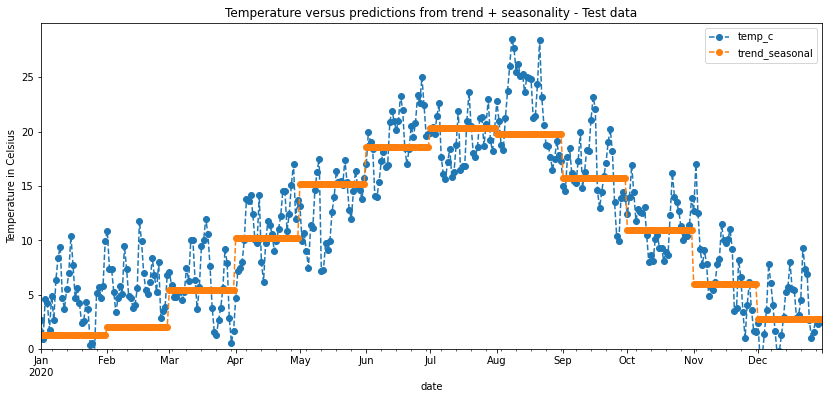

In [131]:
# Ploting

plot_timeseries(data_test[['temp_c', 'trend_seasonal']], 
                title="Temperature versus predictions from trend + seasonality - Test data")

In [133]:
data_test['remainder'] = data_test['temp_c'] - data_test['trend_seasonal']

# Create the lagged variable

data_test['lag1'] = data_test['remainder'].shift(1)

data_test.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1
date,,,,,,,,,,,,,,,,,
2020-01-01,2.7,25202,0,0,0,0,1,0,0,0,0,0,0,0,1.283325,1.416675,NaN
2020-01-02,0.9,25203,0,0,0,0,1,0,0,0,0,0,0,0,1.283396,-0.383396,1.416675
2020-01-03,4.6,25204,0,0,0,0,1,0,0,0,0,0,0,0,1.283467,3.316533,-0.383396
2020-01-04,4.2,25205,0,0,0,0,1,0,0,0,0,0,0,0,1.283538,2.916462,3.316533
2020-01-05,1.8,25206,0,0,0,0,1,0,0,0,0,0,0,0,1.283609,0.516391,2.916462


In [134]:
data_train.tail()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1,predictions_full
date,,,,,,,,,,,,,,,,,,
2019-12-27,3.1,25197,0,0,1,0,0,0,0,0,0,0,0,0,2.743759,0.356241,2.156312,4.504473
2019-12-28,1.3,25198,0,0,1,0,0,0,0,0,0,0,0,0,2.743831,-1.443831,0.356241,3.056454
2019-12-29,0.0,25199,0,0,1,0,0,0,0,0,0,0,0,0,2.743902,-2.743902,-1.443831,1.608436
2019-12-30,4.5,25200,0,0,1,0,0,0,0,0,0,0,0,0,2.743973,1.756027,-2.743902,0.562648
2019-12-31,6.0,25201,0,0,1,0,0,0,0,0,0,0,0,0,2.744044,3.255956,1.756027,4.182744


In [142]:
# Fill NaN

data_test.loc['2020-01-01', 'lag1'] = data_train.loc['2019-12-31', 'remainder']

data_test.head()

,temp_c,timestep,April,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,lag1
date,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2.7,25202.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.283325,1.416675,NaN
2020-01-02 00:00:00,0.9,25203.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.283396,-0.383396,1.416675
2020-01-03 00:00:00,4.6,25204.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.283467,3.316533,-0.383396
2020-01-04 00:00:00,4.2,25205.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.283538,2.916462,3.316533
2020-01-05 00:00:00,1.8,25206.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.283609,0.516391,2.916462


In [ ]:
# Full model predictions

X_test = data_test.drop(['temp_c', 'trend_seasonal', 'remainder'], axis=1)

# Create the predictions

data_test['predictions_full'] = m_full.predict(X_test)

data_test.head()

In [ ]:
plot_timeseries(data_test[['temp_c', 'trend_seasonal', 'predictions_full']], ylim=False)

In [ ]:
# Checking R squared score

print(r2_score(data_test['temp_c'], data_test['trend_seasonal']))

print(r2_score(data_test['temp_c'], data_test['predictions_full'])) # score of the full model

In [ ]:
# Join test and train data together

data_combined = data_train.append(data_test)
data_combined.tail()

In [ ]:
data_combined.head()

In [ ]:
data_combined.isna().sum()

In [ ]:
# Re-train model on whole dataset

X_combined = data_combined.drop(columns=['temp_c', 'trend_seasonal', 'remainder', 'predictions_full'])
y_combined = data_combined['temp_c']

m_full_combined = LinearRegression()
m_full_combined.fit(X_combined, y_combined)

In [ ]:
data_combined.index.max()

In [ ]:
data_combined.tail()

In [ ]:
# Generating features for the time point ???

X_future = []

timestep = data_combined['timestep'].max() + 1
months = [0]*4 + [1] + [0]*7   #dummy code for Jan
lag = data_combined.loc['1960-12-01', 'remainder'] # taking the last remainder 

print(timestep, months, lag)

In [ ]:
X_future.append(timestep)
X_future.extend(months)
X_future.append(lag)
#X_future[144, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, -21.286363636363717]

In [ ]:
X_future

In [ ]:
X_future = pd.DataFrame([X_future])
X_future.columns = X_combined.columns

X_future

In [ ]:
print("Prediction for 1961-01-01 is {}".format(m_full_combined.predict(X_future)[0]))

In [ ]:
m_full_combined.coef_

In [169]:
# ARIMA Modeling 

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Set the figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [162]:
data_train = pd.read_csv('temp_train.csv', parse_dates=True, index_col=0)
data_train.head

<bound method NDFrame.head of             temp_c
date              
1951-01-01    -4.0
1951-01-02    -1.4
1951-01-03    -1.2
1951-01-04     0.4
1951-01-05     2.5
...            ...
2019-12-27     3.1
2019-12-28     1.3
2019-12-29     0.0
2019-12-30     4.5
2019-12-31     6.0

[25202 rows x 1 columns]>

In [163]:
data_train['diff1'] = data_train['temp_c'].diff()

data_train.head()

,temp_c,diff1
date,,
1951-01-01,-4.0,NaN
1951-01-02,-1.4,2.6
1951-01-03,-1.2,0.2
1951-01-04,0.4,1.6
1951-01-05,2.5,2.1


In [164]:
# Apply the augmented Dicky-Fuller stationarity test

def print_adf(data):
    """ 
    Prints the results of the augmented Dickey Fuller Test
    """
    adf_stats, p, used_lag, n_obs, levels, information_criterion = adfuller(data)
    
    print(f""" 
              adf_stats: {adf_stats}
              p: {p} 
              used lag: {used_lag} 
              number of observations: {n_obs}
            
              CI 99%: {levels['1%']}
              CI 95%: {levels['5%']}
              CI 90%: {levels['10%']}
              information criterion (AIC): {information_criterion}
            """)

In [165]:
print_adf(data_train['diff1'].dropna())

 
              adf_stats: -22.619397943487087
              p: 0.0 
              used lag: 46 
              number of observations: 25154
            
              CI 99%: -3.4306099971159574
              CI 95%: -2.8616549108844085
              CI 90%: -2.566831163698501
              information criterion (AIC): 112947.56830612142
            


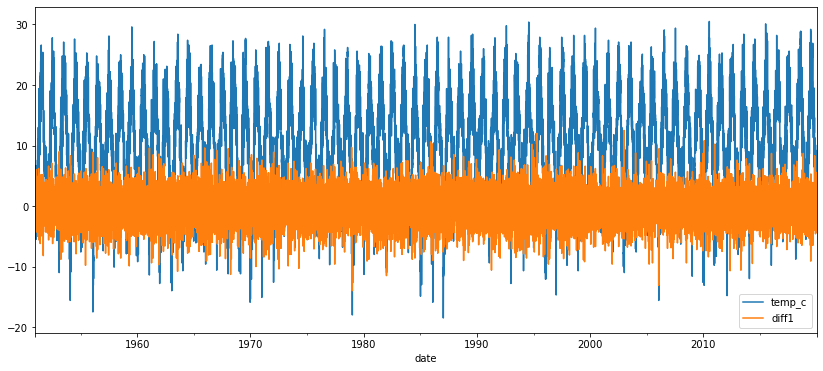

In [166]:
data_train.plot()

plt.show()

In [167]:
# Saving remainder before in a csv file

remainder.head()

,remainder,lag1,prediction_ar1,residual
date,,,,
1951-01-02,-0.890260,-3.490189,-2.807195,1.916935
1951-01-03,-0.690332,-0.890260,-0.715865,0.025533
1951-01-04,0.909597,-0.690332,-0.555046,1.464644
1951-01-05,3.009526,0.909597,0.731904,2.277622
1951-01-06,4.909455,3.009526,2.421044,2.488411


In [160]:
print_adf(remainder)

ValueError: x is required to have ndim 1 but has ndim 2

In [ ]:
plot_acf(remainder);

plt.show()

In [ ]:
plot_pacf(remainder);

plt.show()

In [170]:
auto_arima_model = auto_arima(data_train['temp_c'], start_p=0, start_q=0, max_p=15, max_q=15, max_d=2)

NameError: name 'auto_arima' is not defined

In [ ]:
auto_arima_model

In [ ]:
# Fit and ARIMA (3,1,4) model

model = ARIMA(data_train['temp_c'], order=(3,1,4)).fit()

In [ ]:
plt.plot(data_train['temp_c'], label='temp_data')
plt.plot(model.predict(), label='arima_predictions') 

plt.show()

In [ ]:
seasonal_dummies = pd.get_dummies(data_train.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(data_train.index)

data_train = data_train.join(seasonal_dummies)

In [ ]:
seasonal_dummies

In [ ]:
data_train.head()

In [ ]:
# Exog in statsmodels ARIMA is the same as X in any sklearn model

model_season = ARIMA(data_train['temp_c'], order=(3,1,4), exog=seasonal_dummies).fit()

In [ ]:
plt.plot(data_train['temp_c'], label='temp_data')
plt.plot(model.predict(), label='arima predictions -- no seasnonality')
plt.plot(model_season.predict(), label='arima predictions -- seasonality')
plt.legend()

plt.show()

In [ ]:
rmse_no_seasonality = np.sqrt(mean_squared_error(data_train['temp_c'], model.predict()))

rmse_seasonality = np.sqrt(mean_squared_error(data_train['temp_c'], model_season.predict()))

In [ ]:
rmse_no_seasonality, rmse_seasonality

In [ ]:
data_train.tail

In [ ]:
model.forecast

In [ ]:
seasonal_dummies.iloc[0]

In [ ]:
model_season.forecast(exog=seasonal_dummies.iloc[0])

In [ ]:
model.predict(start='1960-01-01', end='1960-12-01')

In [ ]:
seasonal_dummies.iloc[0:12]

In [ ]:
model_season.predict(start='1960-01-01', end='1960-12-01', exog=seasonal_dummies.iloc[0:12])

In [ ]:
test_seasonality_pred

In [ ]:
data_test = pd.read_csv('data_test.csv', parse_dates=True, index_col=0)

In [ ]:
data_test

In [ ]:
# Adding predictions from both models

data_test['predictions'] = model.predict(start='1960-01-01', end='1960-12-01').values

data_test['predictions_season'] =  model_season.predict(start='1960-01-01', 
                                                           end='1960-12-01', exog=seasonal_dummies.iloc[0:12])

In [ ]:
data_test

In [ ]:
plt.plot(flights_test['temp_c'], label='temp_data')
plt.plot(flights_test['predictions'], label='arima predictions -- no seasnonality')
plt.plot(flights_test['predictions_season'], label='arima predictions -- seasonality')
plt.legend()

plt.show()

In [ ]:
model.predict(start='1960-01-01', end='1961-12-01').iloc[-1]